In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Layers for FNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

# Layers for CNN
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD, Adam

# For data preprocessing
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

#### 1. Data Collection and Collation

In [2]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [3]:
# load fashion MNIST dataset
(x_train, y_train_rawdata), (x_test, y_test_rawdata) = datasets.fashion_mnist.load_data()

# 標準化
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

# One-hot encoding
y_train = to_categorical(y_train_rawdata, 10)
y_test = to_categorical(y_test_rawdata, 10)

In [4]:
print(len(x_train), len(x_test))

60000 10000


(28, 28)


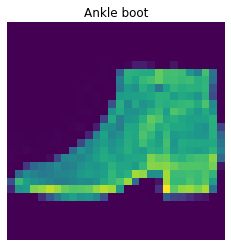

In [5]:
n = 10070
plt.imshow(x_train[n])
plt.title(class_names[y_train_rawdata[n].squeeze()])
plt.axis("off");
print(x_train[n].shape)

In [6]:
# reshape成(28, 28, 1)以方便進模型
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

#### 2. 建立用於分類 Fashion MNIST 的CNN模型

In [7]:
CNN_layers = [Conv2D(32, (5, 5), input_shape=(28, 28, 1), padding="same", activation="relu", name="Conv2D_1"),
              MaxPool2D(),
              Conv2D(64, (5, 5), padding="same", activation="relu", name='Conv2D_2'),
              MaxPool2D(),
              Conv2D(128, (5, 5), padding="same", activation="relu", name='Conv2D_3'),
              GlobalAveragePooling2D()]

FC_layers = [Dense(units=87, activation="relu"),
             Dense(units=10, activation='softmax')]

In [8]:
model_fashion = Sequential(CNN_layers + FC_layers)

In [9]:
model_fashion.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
Conv2D_2 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
Conv2D_3 (Conv2D)            (None, 7, 7, 128)         204928    
_________________________________________________________________
global_average_pooling2d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 87)                1

In [10]:
model_fashion.compile(loss="categorical_crossentropy", optimizer=SGD(lr = 0.05), metrics=["accuracy"])

In [11]:
model_fashion.fit(x_train, y_train, batch_size=64, epochs=3, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 95s 2ms/sample - loss: 1.2272 - accuracy: 0.5248 - val_loss: 0.8168 - val_accuracy: 0.6814
Epoch 2/3
60000/60000 [==============================] - 93s 2ms/sample - loss: 0.6990 - accuracy: 0.7289 - val_loss: 0.7661 - val_accuracy: 0.7120
Epoch 3/3
60000/60000 [==============================] - 94s 2ms/sample - loss: 0.5986 - accuracy: 0.7708 - val_loss: 0.5900 - val_accuracy: 0.7816


In [13]:
# Prediction
score_train = model_fashion.evaluate(x_train, y_train)
score_test = model_fashion.evaluate(x_test, y_test)

print(f'Train Accuracy: {score_train[1]*100}')
print(f'Test Accuracy: {score_test[1]*100}')

10000/10000 [==============================] - 4s 379us/sample - loss: 0.5900 - accuracy: 0.7816
Train Accuracy: 78.8266658782959
Test Accuracy: 78.15999984741211


#### 3. 利用 Transfer Learning 中的Layer Transfer技巧，訓練用於分類MNIST資料集之CNN Model。

In [17]:
name_list = range(0,10)

In [15]:
# load MNIST
(u_train, v_train_rawdata), (u_test, v_test_rawdata) = datasets.mnist.load_data()

# 標準化
u_train = u_train / u_train.max()
u_test = u_test / u_test.max()

# One-hot encoding
v_train = to_categorical(v_train_rawdata, 10)
v_test = to_categorical(v_test_rawdata, 10)

In [16]:
print(len(x_train), len(x_test))

60000 10000


(28, 28)


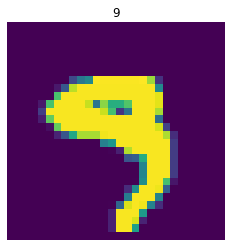

In [19]:
n = 10070
plt.imshow(u_train[n])
plt.title(name_list[v_train_rawdata[n].squeeze()])
plt.axis("off");
print(u_train[n].shape)

In [20]:
# reshape成(28, 28, 1)以方便進模型
u_train = u_train.reshape(60000, 28, 28, 1)
u_test = u_test.reshape(10000, 28, 28, 1)

#### 跟上面的模型借CNN_layers

In [21]:
FC_layers_mnist = [Dense(units=87, activation='relu'),
                   Dense(units=77, activation='relu'),
                   Dense(units=10, activation='softmax')]

In [22]:
model_mnist = Sequential(CNN_layers+FC_layers_mnist)
model_mnist.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
Conv2D_2 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
Conv2D_3 (Conv2D)            (None, 7, 7, 128)         204928    
_________________________________________________________________
global_average_pooling2d (Gl (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 87)               

#### 採Frozen方式

In [23]:
for layer in CNN_layers:
    layer.trainable = False

In [24]:
model_mnist.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
Conv2D_2 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
Conv2D_3 (Conv2D)            (None, 7, 7, 128)         204928    
_________________________________________________________________
global_average_pooling2d (Gl (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 87)               

In [25]:
model_mnist.compile(loss='categorical_crossentropy', 
                    optimizer=Adam(),
                    metrics=['accuracy'])

model_mnist.fit(u_train, v_train,
                batch_size=128, 
                epochs=3,
                validation_data=(u_test, v_test)
                )

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 15s 245us/sample - loss: 0.9504 - accuracy: 0.7035 - val_loss: 0.5162 - val_accuracy: 0.8421
Epoch 2/3
60000/60000 [==============================] - 14s 240us/sample - loss: 0.4537 - accuracy: 0.8615 - val_loss: 0.3696 - val_accuracy: 0.8863
Epoch 3/3
60000/60000 [==============================] - 15s 250us/sample - loss: 0.3568 - accuracy: 0.8904 - val_loss: 0.3214 - val_accuracy: 0.9034


#### 結論：從分類fashion_mnist的神經網路那邊借CNN層，拿來訓練分類MNIST資料集的模型，除了在訓練速度上省下不少時間以外，最後準確度也有非常好的表現！因此日後如果在訓練模型時，可以試著從自身訓練過的模型想看看有何可借之處，就不用每次都從頭訓練了。